# Framework Notebook

In [1]:
#Imports

import os

import rasterio
from rasterio.plot import reshape_as_image
import rasterio.mask
from rasterio.features import rasterize

import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union

import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch


In [2]:
#util imports

from utils import mapGeoToPixel, shapefileToBinarymask, obtainRasterImageSingleBand

In [3]:
#Reading raster names from txt file

raster_path_names = []
shapefile_path_names = []

#SHP_names.txt
#raster_names.txt

# Step 1: Open the file
with open('SHP_names.txt', 'r') as file:

    # Step 2: Read the contents of the file
    lines = file.readlines()

    # Step 3: Iterate over the lines
    for line in lines:

        # Step 4: Split the line using commas
        values = line.strip().split(',')

        # Process the values
        for value in values:
            # Do something with each value
            shapefile_path_names.append(value)
            
# Step 1: Open the file
with open('raster_names.txt', 'r') as file:

    # Step 2: Read the contents of the file
    lines = file.readlines()

    # Step 3: Iterate over the lines
    for line in lines:

        # Step 4: Split the line using commas
        values = line.strip().split(',')

        # Process the values
        for value in values:
            # Do something with each value
            raster_path_names.append(value)

In [4]:
index = 3

print(len(raster_path_names))
print(len(shapefile_path_names))
print(shapefile_path_names[index])
print(raster_path_names[index])

9
9
n31_e103_SHP_separated.shp
n31_e103_3arc_v1.tif


In [5]:
#Reading a raster_image

raster_image_path = '2008Wenchuan_rasters/' + raster_path_names[index]
shapefile_path = 'separatedSHP/' + shapefile_path_names[index]

raster_image = rasterio.open(raster_image_path)
shapefile = gpd.read_file(shapefile_path)


In [16]:
#Generating binary map
binary_map = shapefileToBinarymask(raster_image,shapefile)

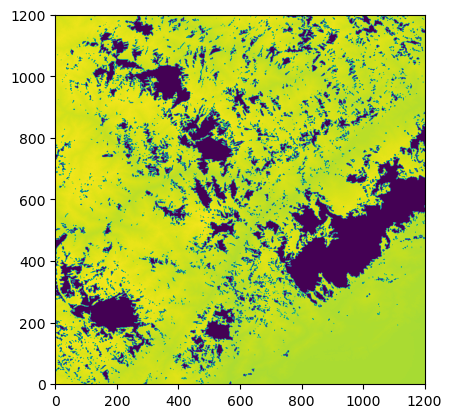

In [20]:
#Converting raster_image and binary_image to tensors
raster_image_numpy = obtainRasterImageSingleBand(raster_image)
plt.imshow(raster_image_numpy,origin='lower')
raster_image_tensor = torch.from_numpy(raster_image_numpy.copy())
binary_map_tensor = torch.from_numpy(binary_map)


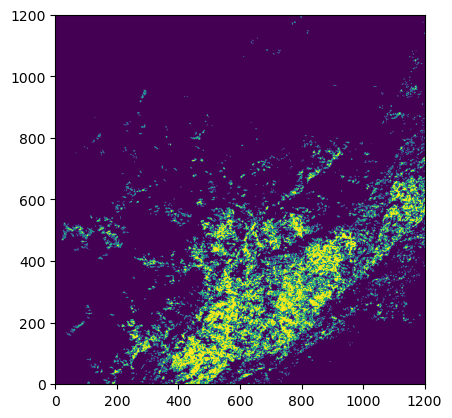

In [21]:
#Visualising new generated files

plt.imshow(binary_map_tensor,origin='lower')

In [ ]:
plt.imshow(raster_image_tensor_flipped,origin='lower')